In [1]:
# Import libraries
import pandas as pd
import numpy as np

# Load the data
movies = pd.read_csv("c2_tmdb_5000_movies.csv")

# 3. Example: cleaning up the movies dataset

In [2]:
# Show top entries of the first 3 text-based columns

movies.select_dtypes("object").iloc[:5,:3]

,genres,homepage,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":..."
1,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na..."
2,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name..."
3,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,..."
4,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."


In [3]:
genres = movies["genres"]
genres[0]

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [4]:
import json

json_obj = json.loads(genres[0])  # Load json string
names = [
    x["name"] for x in json_obj
] 
names

['Action', 'Adventure', 'Fantasy', 'Science Fiction']

In [5]:
genres.map(lambda s: ', '.join(x['name'] for x in json.loads(s)))

0       Action, Adventure, Fantasy, Science Fiction
1                        Adventure, Fantasy, Action
2                          Action, Adventure, Crime
3                    Action, Crime, Drama, Thriller
4                Action, Adventure, Science Fiction
                           ...                     
4798                        Action, Crime, Thriller
4799                                Comedy, Romance
4800               Comedy, Drama, Romance, TV Movie
4801                                               
4802                                    Documentary
Name: genres, Length: 4803, dtype: object

In [6]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("0", "", regex=True)
    s = s.str.replace("1", "", regex=True)
    s = s.str.replace("2", "", regex=True)
    s = s.str.replace("3", "", regex=True)
    s = s.str.replace("4", "", regex=True)
    s = s.str.replace("5", "", regex=True)
    s = s.str.replace("6", "", regex=True)
    s = s.str.replace("7", "", regex=True)
    s = s.str.replace("8", "", regex=True)
    s = s.str.replace("9", "", regex=True)
    s = s.str.replace("    ", ", ")
    s = s.str.replace("   ", "")
    return s

In [7]:
genres = transform(genres)
genres[0]

'Action, Adventure, Fantasy, Science Fiction'

In [8]:
movies["genres"] = genres

In [9]:
movies.loc[:, ["title", "genres"]].head(10)

,title,genres
0,Avatar,"Action, Adventure, Fantasy, Science Fiction"
1,Pirates of the Caribbean: At World's End,"Adventure, Fantasy, Action"
2,Spectre,"Action, Adventure, Crime"
3,The Dark Knight Rises,"Action, Crime, Drama, Thriller"
4,John Carter,"Action, Adventure, Science Fiction"
5,Spider-Man 3,"Fantasy, Action, Adventure"
6,Tangled,"Animation, Family"
7,Avengers: Age of Ultron,"Action, Adventure, Science Fiction"
8,Harry Potter and the Half-Blood Prince,"Adventure, Fantasy, Family"
9,Batman v Superman: Dawn of Justice,"Action, Adventure, Fantasy"


# 4. Exercise: further practice with the movies dataset

In [10]:
keywords = movies["keywords"]
keywords[0]

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [11]:
def transform(s):
    s = s.str.strip("[]")
    s = s.str.replace("{", "", regex=True)
    s = s.str.replace("}", "", regex=True)
    s = s.str.replace(",", "", regex=True)
    s = s.str.replace('"id":', "", regex=True)
    s = s.str.replace('"name":', "", regex=True)
    s = s.str.replace('"', "", regex=True)
    s = s.str.replace("[0-9]+", "", regex=True)
    s = s.str.replace("    ", ", ")
    s = s.str.replace("   ", "")
    return s

In [12]:
keywords = transform(keywords)
keywords.head()

0    culture clash, future, space war, space colony...
1    ocean, drug abuse, exotic island, east india t...
2    spy, based on novel, secret agent, sequel, mi,...
3    dc comics, crime fighter, terrorist, secret id...
4    based on novel, mars, medallion, space travel,...
Name: keywords, dtype: object

In [13]:
keywords_df = keywords.str.split(',', expand=True)
keywords_df.head()

,0,1,2,3,4,5,6,7,8,9,...,87,88,89,90,91,92,93,94,95,96
0,culture clash,future,space war,space colony,society,space travel,futuristic,romance,space,alien,...,None,None,None,None,None,None,None,None,None,None
1,ocean,drug abuse,exotic island,east india trading company,love of one's life,traitor,shipwreck,strong woman,ship,alliance,...,None,None,None,None,None,None,None,None,None,None
2,spy,based on novel,secret agent,sequel,mi,british secret service,united kingdom,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,dc comics,crime fighter,terrorist,secret identity,burglar,hostage drama,time bomb,gotham city,vigilante,cover-up,...,None,None,None,None,None,None,None,None,None,None
4,based on novel,mars,medallion,space travel,princess,alien,steampunk,martian,escape,edgar rice burroughs,...,None,None,None,None,None,None,None,None,None,None


In [14]:
movies['keywords'] = keywords_df[0]+', '+keywords_df[1]+', '+keywords_df[2]
movies.head()


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"Action, Adventure, Fantasy, Science Fiction",http://www.avatarmovie.com/,19995,"culture clash, future, space war",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"Adventure, Fantasy, Action",http://disney.go.com/disneypictures/pirates/,285,"ocean, drug abuse, exotic island",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"Action, Adventure, Crime",http://www.sonypictures.com/movies/spectre/,206647,"spy, based on novel, secret agent",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"Action, Crime, Drama, Thriller",http://www.thedarkknightrises.com/,49026,"dc comics, crime fighter, terrorist",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"Action, Adventure, Science Fiction",http://movies.disney.com/john-carter,49529,"based on novel, mars, medallion",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# 6. Exercise: using regular expressions in pandas

In [15]:
import pandas as pd

meal_plan = [
    "Monday: 9:12am – Omelet,  3:30pm– Apple slices with almond butter",
    "Tuesday: 9:35am – Banana bread, 11:00am –Sauteed veggies, 7:02pm– Taco pie",
    "Wednesday: 9:00am – Banana pancakes",
    "Thursday: 7:23pm– Slow cooker pulled pork",
    "Friday: 3:30pm – Can of tuna",
    "Saturday: 9:11am: Eggs and sweet potato hash browns, 3:22pm: Almonds",
    "Sunday: 11:00am: Meat and veggie stir fry",
]
df = pd.DataFrame(meal_plan, columns=["text"])

In [16]:
df

,text
0,"Monday: 9:12am – Omelet, 3:30pm– Apple slices..."
1,"Tuesday: 9:35am – Banana bread, 11:00am –Saute..."
2,Wednesday: 9:00am – Banana pancakes
3,Thursday: 7:23pm– Slow cooker pulled pork
4,Friday: 3:30pm – Can of tuna
5,Saturday: 9:11am: Eggs and sweet potato hash b...
6,Sunday: 11:00am: Meat and veggie stir fry


In [17]:
sol = df['text'].str.extractall("(\d?\d):(\d\d) ?([ap]m)")
sol

0   1   2
  match            
0 0       9  12  am
  1       3  30  pm
1 0       9  35  am
  1      11  00  am
  2       7  02  pm
2 0       9  00  am
3 0       7  23  pm
4 0       3  30  pm
5 0       9  11  am
  1       3  22  pm
6 0      11  00  am

In [18]:
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
meals = ['breakfast', 'lunch', 'dinner']

In [19]:
new_index = sol.index.set_levels([days, meals])
sol.index = new_index
new_index = sol.index.set_names(['Day', 'Meal'])
sol.index = new_index
sol.columns = ['Hour', 'Minute', 'Period']
sol

Hour Minute Period
Day Meal                        
Mon breakfast    9     12     am
    lunch        3     30     pm
Tue breakfast    9     35     am
    lunch       11     00     am
    dinner       7     02     pm
Wed breakfast    9     00     am
Thu breakfast    7     23     pm
Fri breakfast    3     30     pm
Sat breakfast    9     11     am
    lunch        3     22     pm
Sun breakfast   11     00     am

# 7. Text analytics

In [20]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Optional: used to avoid blurry output plots in Jupyter Notebooks
%config InlineBackend.figure_format = 'retina' 

## A first look

In [21]:
# Path to the data
PATH_DATA = 'c2_press_releases_covid19.csv'

# Load press releases
df = pd.read_csv(PATH_DATA)

print('Data shape: ',df.shape)

Data shape:  (61, 4)


In [22]:
# Print a few samples

df.head(3)

,title,url,pub_date,text
0,Coronavirus: Federal Council bans large-scale ...,https://www.admin.ch/gov/en/start/documentatio...,2020-02-28,"Bern, 28.02.2020 - An extraordinary meeting of..."
1,Coronavirus: Federal Council declares ‘extraor...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-16,"Bern, 16.03.2020 - At an extraordinary meeting..."
2,Coronavirus: Federal Council bans gatherings o...,https://www.admin.ch/gov/en/start/documentatio...,2020-03-20,"Bern, 20.03.2020 - The Federal Council is step..."


In [23]:
# Show a few samples (randomly sampled)

df.sample(3)

,title,url,pub_date,text
44,Coronavirus: Federal government to cover costs...,https://www.admin.ch/gov/en/start/documentatio...,2021-01-27,"Bern, 27.01.2021 - At its meeting on 27 Januar..."
23,Coronavirus: Workers from third countries to b...,https://www.admin.ch/gov/en/start/documentatio...,2020-06-24,"Bern, 24.06.2020 - Since 11 May various steps ..."
48,Coronavirus: Federal Council proposes test off...,https://www.admin.ch/gov/en/start/documentatio...,2021-03-05,"Bern, 05.03.2021 - The Federal Council wants t..."


In [24]:
# Change display option for max_colwidth

pd.set_option('display.max_colwidth', 500)

In [25]:
# Remove 'url' column

df.drop(labels = ['url'],    # specify which columns to drop
        axis=1,              # drops labels from the columns
        inplace=True         # apply changes to the original df
       )

# Print data shape
print('Data shape: ',df.shape)

Data shape:  (61, 3)


In [26]:
# Show a few samples
df.sample(3)

,title,pub_date,text
37,Coronavirus: Federal Council adjusts COVID-19 support measures to second wave,2020-11-18,"Bern, 18.11.2020 - During its meeting on 18 November 2020, the Federal Council decided to propose that the winter session of Parliament urgently debate ad hoc adjustments to the COVID-19 Act. This would enable a swifter reaction to ongoing developments during the second wave of the COVID-19 pandemic. The proposal includes an expansion of the hardship support programme to CHF 1 billion in total and an increase of the Confederation's share to around two thirds. In addition, short-time working ..."
39,Coronavirus: Federal Council introduces further measures and urges cantons with increasing case numbers to take immediate action,2020-12-04,"Bern, 04.12.2020 - The epidemiological situation in Switzerland remains extremely serious. The Federal Council has therefore called on cantons in which case numbers are increasing to take immediate action. It also decided at its meeting on 4 December to introduce new measures. The aim is to bring down the number of cases further still, particularly in the run-up to the festive period. Stricter rules for shops will come into effect on Wednesday, 9 December, and capacity in closed forms of tra..."
45,Coronavirus: Federal Council to cover vaccination costs for further groups,2021-02-03,"Bern, 03.02.2021 - At its meeting on 3 February, the Federal Council took the decision to extend free access to the coronavirus vaccination to further groups of people in Switzerland. The federal government will now cover the cost of vaccinations for people who live in Switzerland but do not have mandatory health insurance cover, such as diplomats. The vaccination will also be free for cross-border workers employed by Swiss healthcare and care institutions who are not insured in Switzerland...."


In [27]:
# Check for duplicated entries

print('Found {} duplicated entries.'.format(df.duplicated().sum()))

Found 0 duplicated entries.


In [28]:
# Check for missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   title     61 non-null     object
 1   pub_date  61 non-null     object
 2   text      61 non-null     object
dtypes: object(3)
memory usage: 1.6+ KB


In [29]:
# Convert pub_date to datetime dtype

df['pub_date'] = pd.to_datetime(df.pub_date)

# Check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   title     61 non-null     object        
 1   pub_date  61 non-null     datetime64[ns]
 2   text      61 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 1.6+ KB


In [30]:
# Print earliest publication date

df['pub_date'].min()

Timestamp('2020-02-28 00:00:00')

In [31]:
# Print latest publication date

df['pub_date'].max()

Timestamp('2021-08-18 00:00:00')

## Text length

In [32]:
# Count the number of tokens in document
len(df['text'][0].split())

450

In [33]:
df['text'].apply(lambda x: len(x.split()))

0      450
1     1982
2     1393
3      518
4      997
      ... 
56     983
57     105
58    2821
59    1675
60     534
Name: text, Length: 61, dtype: int64

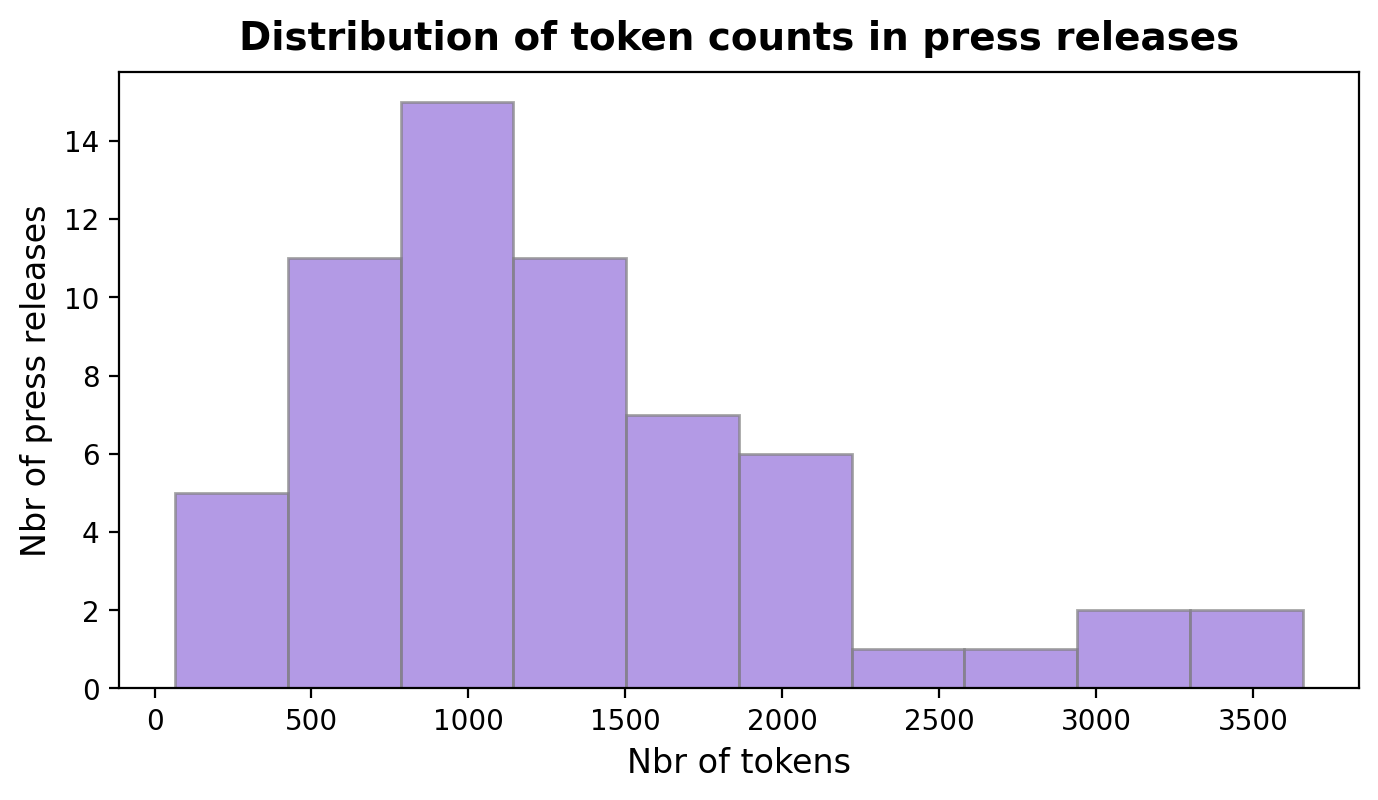

In [34]:
# Plot the number of tokens per press release

# Barplot and font specifications
barplot_specs = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
label_specs   = {"fontsize": 12}
title_specs   = {"fontsize": 14, "fontweight": "bold", "y": 1.01}

plt.figure(figsize=(8,4))

plt.hist(df['text'].apply(lambda x:len(x.split())), **barplot_specs)
plt.xlabel('Nbr of tokens', **label_specs)
plt.ylabel('Nbr of press releases',**label_specs)
plt.title('Distribution of token counts in press releases',**title_specs)
plt.show()

In [35]:
df['text'].apply(lambda x: len(x.split())).describe()

count      61.000000
mean     1287.098361
std       800.633597
min        66.000000
25%       752.000000
50%      1132.000000
75%      1706.000000
max      3658.000000
Name: text, dtype: float64

## Word frequencies

In [36]:
sample = df['text'][0]
print(sample)

Bern, 28.02.2020 - An extraordinary meeting of the Federal Council was held today, 28 February. In view of the current situation and the spread of the coronavirus, the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act. Large-scale events involving more than 1000 people are to be banned. The ban comes into immediate effect and will apply at least until 15 March. The Federal Council's top priority is to protect the population. It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act. This enables the Federal Council, in consultation with the cantons, to order measures that are normally the responsibility of the cantons.The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather. This ban on events comes into immediate effect and will apply at least until 15 March. The canton

In [37]:
import re

# Replace punctuation marks (,.()) with whitespace
clean_sample = re.sub(r"[,.()]", # regex pattern
                      " ",       # replace with whitespace
                      sample     # string
                     )

# Replace single hyphens with whitespace
clean_sample = re.sub(r"\s-\s",      # regex pattern
                      " ",           # replace with whitespace
                      clean_sample   # string
                     )

# Print clean_sample
print(clean_sample)

Bern  28 02 2020 An extraordinary meeting of the Federal Council was held today  28 February  In view of the current situation and the spread of the coronavirus  the Federal Council has categorised the situation in Switzerland as ‘special’ in terms of the Epidemics Act  Large-scale events involving more than 1000 people are to be banned  The ban comes into immediate effect and will apply at least until 15 March  The Federal Council's top priority is to protect the population  It is responding to the latest developments in the coronavirus epidemic and has categorised the situation in Switzerland as ‘special' in terms of the Epidemics Act  This enables the Federal Council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons The Federal Council is banning public and private events in Switzerland at which more than 1000 people would gather  This ban on events comes into immediate effect and will apply at least until 15 March  The cantons 

In [38]:
# Split clean_sample on whitespace
print(clean_sample.split()[0:150])

# Note: we show only the first 150 tokens

['Bern', '28', '02', '2020', 'An', 'extraordinary', 'meeting', 'of', 'the', 'Federal', 'Council', 'was', 'held', 'today', '28', 'February', 'In', 'view', 'of', 'the', 'current', 'situation', 'and', 'the', 'spread', 'of', 'the', 'coronavirus', 'the', 'Federal', 'Council', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', '‘special’', 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'Large-scale', 'events', 'involving', 'more', 'than', '1000', 'people', 'are', 'to', 'be', 'banned', 'The', 'ban', 'comes', 'into', 'immediate', 'effect', 'and', 'will', 'apply', 'at', 'least', 'until', '15', 'March', 'The', 'Federal', "Council's", 'top', 'priority', 'is', 'to', 'protect', 'the', 'population', 'It', 'is', 'responding', 'to', 'the', 'latest', 'developments', 'in', 'the', 'coronavirus', 'epidemic', 'and', 'has', 'categorised', 'the', 'situation', 'in', 'Switzerland', 'as', "‘special'", 'in', 'terms', 'of', 'the', 'Epidemics', 'Act', 'This', 'enables', 'the', 'Federal', 'Counci

In [39]:
from collections import Counter

# Print top-25 most frequent tokens in clean_sample
Counter(clean_sample.split()).most_common(25)

[('the', 39),
 ('in', 20),
 ('to', 15),
 ('of', 12),
 ('Switzerland', 11),
 ('Federal', 10),
 ('and', 10),
 ('is', 10),
 ('The', 9),
 ('Council', 8),
 ('public', 8),
 ('events', 7),
 ('people', 7),
 ('at', 7),
 ('cantons', 6),
 ('or', 6),
 ('than', 5),
 ('1000', 5),
 ('are', 5),
 ('ban', 5),
 ('will', 5),
 ('situation', 4),
 ('It', 4),
 ('This', 4),
 ('with', 4)]

## Case folding

In [40]:
# Case folding
processed_sample = clean_sample.lower()

print("Convert to lowercase: \n\n{}\n".format(processed_sample))

Convert to lowercase: 

bern  28 02 2020 an extraordinary meeting of the federal council was held today  28 february  in view of the current situation and the spread of the coronavirus  the federal council has categorised the situation in switzerland as ‘special’ in terms of the epidemics act  large-scale events involving more than 1000 people are to be banned  the ban comes into immediate effect and will apply at least until 15 march  the federal council's top priority is to protect the population  it is responding to the latest developments in the coronavirus epidemic and has categorised the situation in switzerland as ‘special' in terms of the epidemics act  this enables the federal council  in consultation with the cantons  to order measures that are normally the responsibility of the cantons the federal council is banning public and private events in switzerland at which more than 1000 people would gather  this ban on events comes into immediate effect and will apply at least unti

## Stop words

In [41]:
# Load English stopwords from nltk

import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")

In [42]:
# Print stopwords

print("{} stopwords in NLTK's list.\n".format(len(stopwords_english)))
print(stopwords_english)

179 stopwords in NLTK's list.

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only',

In [43]:
# Use a list comprehension to remove stopwords from processed_sample

processed_sample_tokens = [tok for tok in processed_sample.split() if tok not in stopwords_english]
print(processed_sample_tokens)

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal', 'council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread', 'coronavirus', 'federal', 'council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms', 'epidemics', 'act', 'large-scale', 'events', 'involving', '1000', 'people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'federal', "council's", 'top', 'priority', 'protect', 'population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms', 'epidemics', 'act', 'enables', 'federal', 'council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal', 'council', 'banning', 'public', 'private', 'events', 'switzerland', '1000', 'people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons', 'responsible', 'enforcing', 'ban'

In [44]:
# Print top-25 most frequent tokens in processed_sample_tokens

Counter(processed_sample_tokens).most_common(25)

[('switzerland', 11),
 ('federal', 10),
 ('council', 8),
 ('public', 8),
 ('events', 7),
 ('people', 7),
 ('cantons', 6),
 ('1000', 5),
 ('ban', 5),
 ('situation', 4),
 ('private', 4),
 ('would', 4),
 ('gather', 4),
 ('event', 4),
 ('held', 3),
 ('spread', 3),
 ('coronavirus', 3),
 ('categorised', 3),
 ('terms', 3),
 ('epidemics', 3),
 ('act', 3),
 ('comes', 3),
 ('immediate', 3),
 ('effect', 3),
 ('apply', 3)]

In [45]:
# Define preprocess_text function

def preprocess_text(text):
    
    '''
    This function preprocesses raw samples of text:
    - Converts to lowercase
    - Replaces common punctuation marks with whitespace
    - Removes stop words
    - Splits text on whitespace
    
    INPUT: 
    - text: "raw" text (string)
    
    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    '''
    
    # Convert to lowercase
    clean_text = text.lower()
    
    # Replace common punctuation marks with whitespace
    clean_text = re.sub(r"[,.()]"," ", clean_text)
    
    # Replace single hyphens with whitespace
    clean_text = re.sub(r"\s-\s"," ", clean_text)
    
    # Remove stop words and split on whitespace
    processed_sample_tokens = [tok for tok in clean_text.split() if tok not in stopwords_english]
    
    return processed_sample_tokens

In [46]:
# Sample a press release randomly from the data
import random
sample =  df.iloc[random.randint(0,len(df)-1),2]

print(preprocess_text(sample)[0:150])

# Note: we show only the first 150 tokens

['bern', '16', '04', '2020', '27', 'april', 'hospitals', 'able', 'resume', 'medical', 'procedures', 'including', 'non-urgent', 'procedures', 'outpatient', 'medical', 'practices', 'hairdressing', 'salons', 'massage', 'practices', 'cosmetic', 'studios', 'allowed', 'reopen', 'diy', 'stores', 'garden', 'centres', 'florists', 'also', 'allowed', 'reopen', 'protection', 'public', 'staff', 'must', 'assured', 'steps', 'decided', 'federal', 'council', 'meeting', '16', 'april', 'situation', 'allows', 'schools', 'children', 'compulsory', 'school', 'age', 'shops', 'able', 'reopen', '11', 'may', '8', 'june', 'upper-secondary', 'schools', 'vocational', 'schools', 'higher', 'education', 'institutions', 'well', 'museums', 'zoos', 'libraries', 'may', 'reopen', 'federal', 'council', 'also', 'issued', 'details', 'regard', 'protecting', 'workers', 'especially', 'high', 'risk', 'view', 'epidemiological', 'trend', 'based', 'expert', 'recommendations', '27', 'april', 'federal', 'council', 'begin', 'ease', 'me

In [47]:
# 1st alternative (using list comprehensions)

preprocessed_press_releases = [preprocess_text(doc) for doc in df['text']]

# Show an example of processed and tokenized text
print(preprocessed_press_releases[0])

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal', 'council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread', 'coronavirus', 'federal', 'council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms', 'epidemics', 'act', 'large-scale', 'events', 'involving', '1000', 'people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'federal', "council's", 'top', 'priority', 'protect', 'population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms', 'epidemics', 'act', 'enables', 'federal', 'council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal', 'council', 'banning', 'public', 'private', 'events', 'switzerland', '1000', 'people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons', 'responsible', 'enforcing', 'ban'

In [48]:
# 2nd alternative (using the apply method)

df['clean_text'] = df['text'].apply(lambda x: preprocess_text(x))

# Show an example of preprocessed and tokenized text
df.sample()

,title,pub_date,text,clean_text
6,Coronavirus: Federal Council extends measures by a week and decides on gradual easing,2020-04-08,"Bern, 08.04.2020 - The measures introduced to combat the coronavirus epidemic are being followed well and are having the desired effect. They will be extended by a week until Sunday, 26 April, but should then gradually begin to be eased before the end of the month. That is the decision taken by the Federal Council at its meeting on 8 April. The Federal Council will decide on steps to ease the measures at its next meeting on 16 April. The COVID-19 epidemic has spread widely in Switzerland. Ho...","[bern, 08, 04, 2020, measures, introduced, combat, coronavirus, epidemic, followed, well, desired, effect, extended, week, sunday, 26, april, gradually, begin, eased, end, month, decision, taken, federal, council, meeting, 8, april, federal, council, decide, steps, ease, measures, next, meeting, 16, april, covid-19, epidemic, spread, widely, switzerland, however, speed, spreading, slowed, significantly, recent, days, measures, put, place, combat, virus, followed, well, public, desired, effec..."


## Collocations

In [49]:
# Import Gensim and Phrases

from gensim.models import Phrases

In [50]:
# Find common collocations in press releases

# Create an instance of the Phrases model
n_gram_model = Phrases(preprocessed_press_releases,       # Expected input format: list of tokenized texts
                       min_count=5,                       # Keeps only collocations with at least min_counts 
                       delimiter=b'_')                    # Glue character used to join collocation tokens

In [53]:
# Apply Phrases to press releases

preprocessed_press_releases_collocations = [n_gram_model[doc] for doc in preprocessed_press_releases]

In [54]:
# Add processed press releases (with collocations) to dataframe

df['clean_text'] = preprocessed_press_releases_collocations

In [55]:
print(preprocessed_press_releases_collocations[0])

['bern', '28', '02', '2020', 'extraordinary', 'meeting', 'federal_council', 'held', 'today', '28', 'february', 'view', 'current', 'situation', 'spread_coronavirus', 'federal_council', 'categorised', 'situation', 'switzerland', '‘special’', 'terms_epidemics', 'act', 'large-scale_events', 'involving', '1000_people', 'banned', 'ban', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', "federal_council's", 'top_priority', 'protect_population', 'responding', 'latest', 'developments', 'coronavirus', 'epidemic', 'categorised', 'situation', 'switzerland', "‘special'", 'terms_epidemics', 'act', 'enables', 'federal_council', 'consultation', 'cantons', 'order', 'measures', 'normally', 'responsibility', 'cantons', 'federal_council', 'banning', 'public', 'private_events', 'switzerland', '1000_people', 'would', 'gather', 'ban', 'events', 'comes', 'immediate', 'effect', 'apply', 'least', '15', 'march', 'cantons_responsible', 'enforcing', 'ban', 'case', 'public', 'private_events', 'fewer_

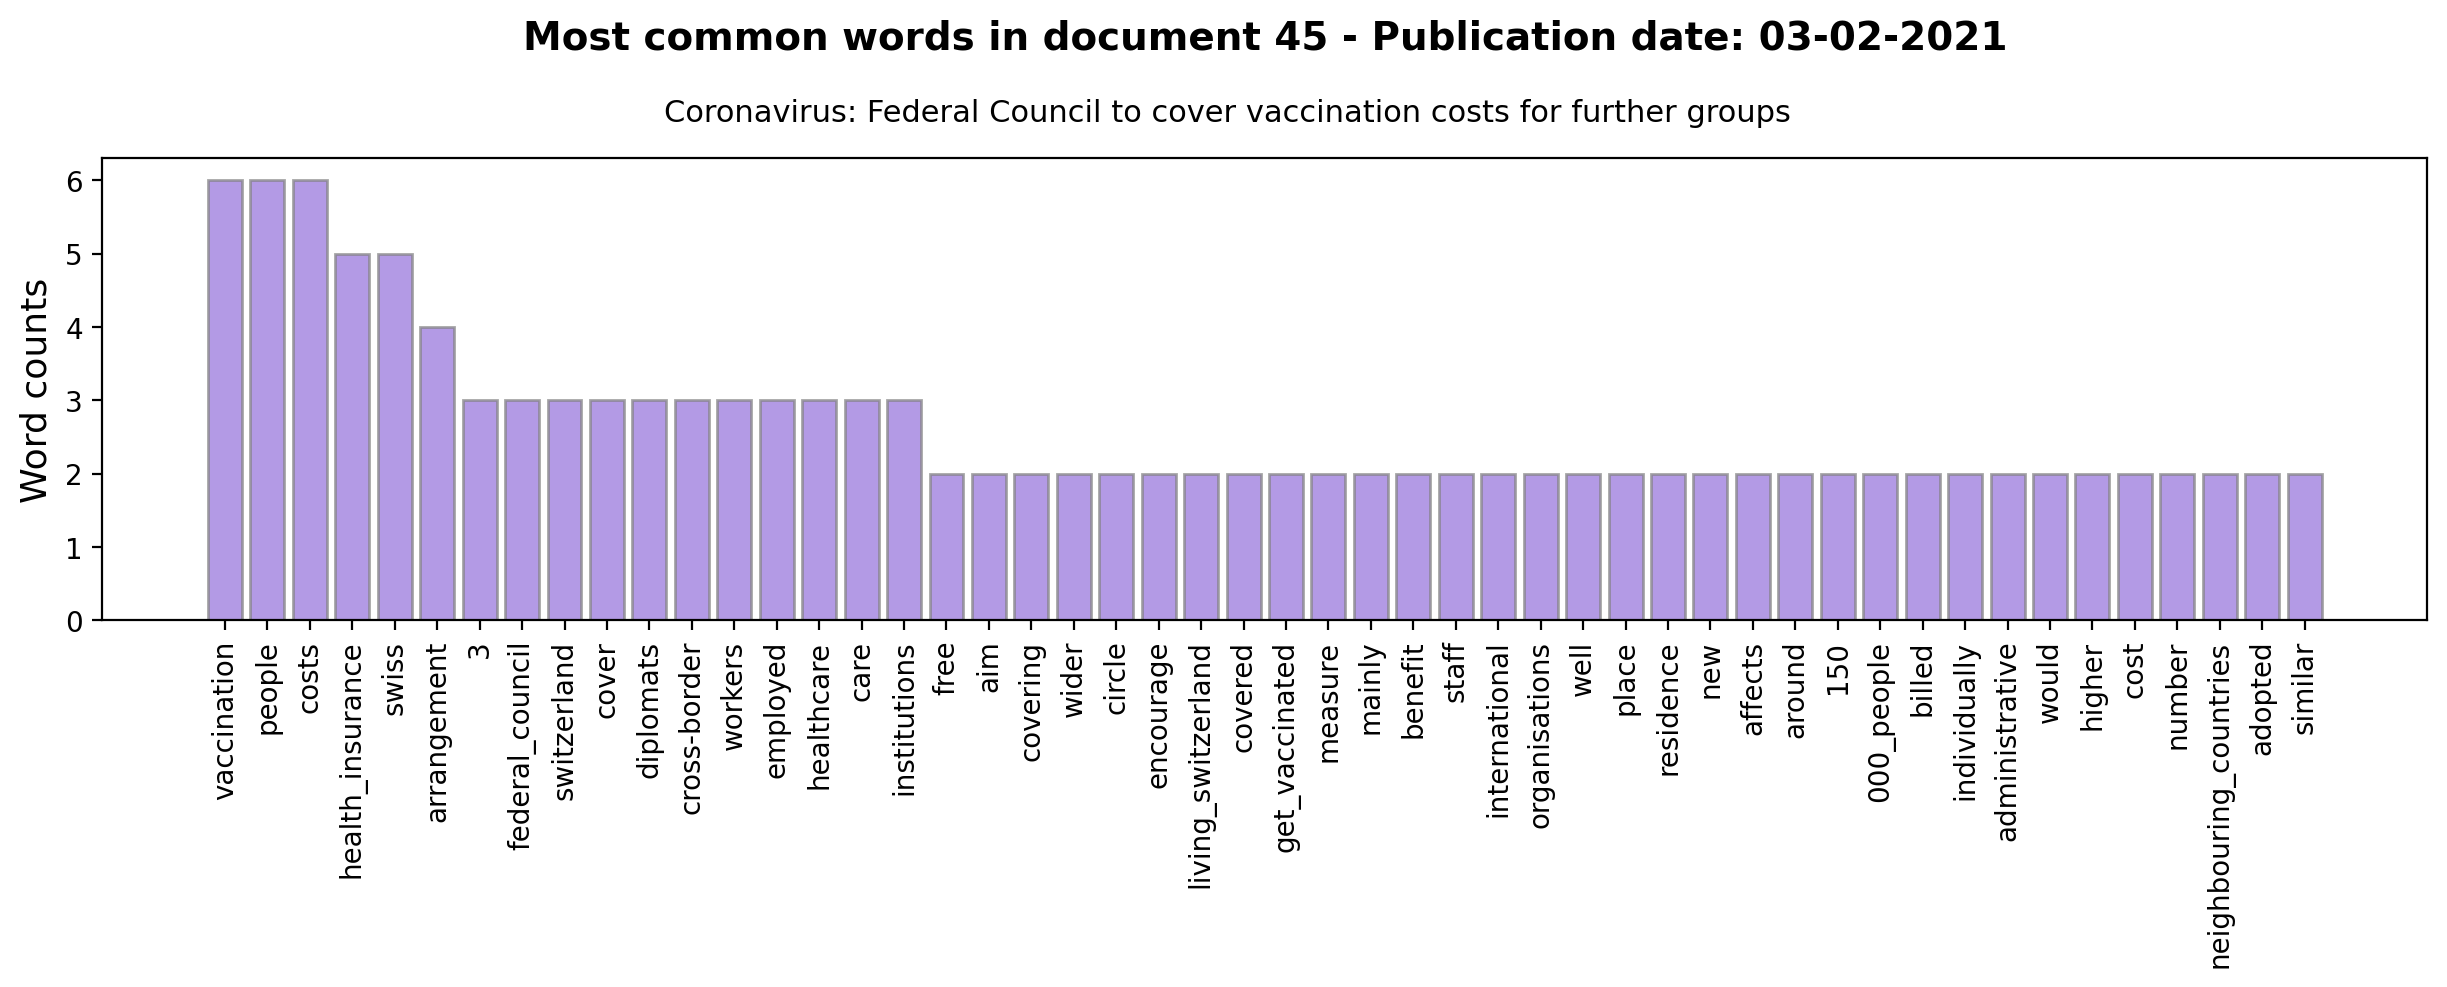

In [58]:
# Generates a random integer between 0 and len(df)
idx = random.randint(0,len(df))

# Find top-50 most common words
w = Counter(preprocessed_press_releases_collocations[idx]).most_common(50)

# Plots top words

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*w), **barplot_specs)
plt.title('Most common words in document {} - Publication date: {}'.format(idx,df.iloc[idx,1].strftime("%d-%m-%Y")), **title_specs)
plt.suptitle(df.iloc[idx,0],**suptitle_specs)
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

In [59]:
# Print the original unprocessed text corresponding to the previous plot 
print('Printing document {}:\n'.format(idx))
print(df.iloc[idx,2])

Printing document 45:

Bern, 03.02.2021 - At its meeting on 3 February, the Federal Council took the decision to extend free access to the coronavirus vaccination to further groups of people in Switzerland. The federal government will now cover the cost of vaccinations for people who live in Switzerland but do not have mandatory health insurance cover, such as diplomats. The vaccination will also be free for cross-border workers employed by Swiss healthcare and care institutions who are not insured in Switzerland. The aim of covering vaccination costs for a wider circle of people is to encourage those living in Switzerland who are not covered by Swiss health insurance to get vaccinated. The measure will mainly benefit diplomats and staff at international organisations, as well as cross-border workers employed at Swiss healthcare and care institutions who have health insurance cover at their place of residence. The new arrangement affects around 150,000 people. If all of these people we

# Tf-idf weighting model

In [61]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of the tf-idf model
tfidf = TfidfVectorizer()

In [62]:
# Join lists of tokens into single strings (for each press release)

X = [" ".join([w for w in doc]) for doc in preprocessed_press_releases_collocations]

In [63]:
# Fit model on text data
tfidf.fit(X)

TfidfVectorizer()

In [64]:
# Show vocabulary
vocabulary = tfidf.get_feature_names_out()

# Print vocabulary length
print('Vocabulary length: {}\n'.format(len(vocabulary)))

# Show a few words from vocabulary
print('Show a few words from vocabulary:')
print(vocabulary[0:500:10])

Vocabulary length: 3947

Show a few words from vocabulary:
['000' '07' '11' '128' '16' '19_april' '1_july' '2021' '23' '27_may'
 '30_people' '480' '5_million' '72' '85' 'able' 'accept' 'accompanying'
 'act' 'acute' 'additional' 'adjustment' 'adolescents' 'advantages'
 'affects' 'age_16' 'ahead' 'airline' 'allfollowing' 'allowedfrom'
 'always' 'amounting' 'announced' 'anyone' 'appeared' 'appointment'
 'april_2020' 'armed' 'article' 'assessments' 'assume_cost'
 'asymptomatic_persons' 'attention' 'austrian' 'automatically'
 'aviation_industry' 'back' 'banned' 'basically' 'beds']


In [65]:
# Get tf-idf representation of text data
X_tfidf = tfidf.transform(X)
print(X_tfidf.shape)

(61, 3947)


In [66]:
df_tfidf = pd.DataFrame(X_tfidf.toarray(),
                        columns=vocabulary)
df_tfidf.head()

,000,000_people,01,02,03,04,04_2020,05,05_2020,06,...,young_people,younger,youth,zealand,zero,zones,zoos,zoos_botanical,zoosin,zurich
0,0.000000,0.0,0.0,0.054617,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.014843,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.032799,0.0,0.0,0.000000,0.016399,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.000000,0.035813,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.123561,0.0,0.0,0.000000,0.020593,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.064655,0.0,0.0,0.0,0.0,0.0


# Top words according to tf-idf scores

In [67]:
# Set number of top words to plot
N = 50

print('Printing top words according to tf-idf for document {}.'.format(idx))

Printing top words according to tf-idf for document 45.


In [68]:
# Sort indexes according to tf-idf scores for document idx

index_sorted = np.argsort(df_tfidf.iloc[idx,:])[::-1]  # descending order

# Print sorted indexes according to tf-idf
index_sorted.values

array([1728,  374, 3790, ..., 2619, 2618,    0])

In [69]:
# Sort words in vocabulary according to tf-idf

features_sorted = np.array(vocabulary)[index_sorted][0:N]

# Print top words according to tf-idf scores
print(features_sorted)

['health_insurance' 'arrangement' 'vaccination' 'costs' 'employed'
 'diplomats' 'care' 'workers' 'swiss' 'wider' 'incur' 'retrospectively'
 'affects' 'billed' 'healthcare' 'cover' 'people' 'cross' 'border'
 '000_people' 'mainly' 'circle' '150' 'individually' 'similar'
 'institutions' 'get_vaccinated' 'expects' 'encourage' 'administrative'
 'residence' 'covering' 'january' 'living_switzerland' 'practice'
 '5_million' 'organisations' 'neighbouring_countries' 'benefit' 'cost'
 'international' 'aim' 'covered' 'higher' 'adopted' 'free' 'measure'
 'around' 'applies' 'would']


In [70]:
# Sort indexes according to tf-idf scores for document idx

index_sorted = np.argsort(df_tfidf.iloc[idx,:])[::-1]  # descending order

# Print sorted indexes according to tf-idf
index_sorted.values

array([1728,  374, 3790, ..., 2619, 2618,    0])

In [71]:
# Sort words in vocabulary according to tf-idf

features_sorted = np.array(vocabulary)[index_sorted][0:N]

# Print top words according to tf-idf scores
print(features_sorted)

['health_insurance' 'arrangement' 'vaccination' 'costs' 'employed'
 'diplomats' 'care' 'workers' 'swiss' 'wider' 'incur' 'retrospectively'
 'affects' 'billed' 'healthcare' 'cover' 'people' 'cross' 'border'
 '000_people' 'mainly' 'circle' '150' 'individually' 'similar'
 'institutions' 'get_vaccinated' 'expects' 'encourage' 'administrative'
 'residence' 'covering' 'january' 'living_switzerland' 'practice'
 '5_million' 'organisations' 'neighbouring_countries' 'benefit' 'cost'
 'international' 'aim' 'covered' 'higher' 'adopted' 'free' 'measure'
 'around' 'applies' 'would']


In [72]:
# Sort tf-idf scores (descending order)

tfidf_weights_sorted = df_tfidf.iloc[idx,:][index_sorted][0:N]
print(tfidf_weights_sorted)

health_insurance          0.317174
arrangement               0.279278
vaccination               0.235070
costs                     0.228551
employed                  0.209458
diplomats                 0.190304
care                      0.150279
workers                   0.150279
swiss                     0.144182
wider                     0.139639
incur                     0.139639
retrospectively           0.139639
affects                   0.139639
billed                    0.139639
healthcare                0.138407
cover                     0.138407
people                    0.135884
cross                     0.133430
border                    0.133430
000_people                0.126870
mainly                    0.126870
circle                    0.126870
150                       0.117810
individually              0.117810
similar                   0.117810
institutions              0.111227
get_vaccinated            0.110782
expects                   0.110782
encourage           

/tmp/ipykernel_9405/150186457.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tfidf_weights_sorted = df_tfidf.iloc[idx,:][index_sorted][0:N]


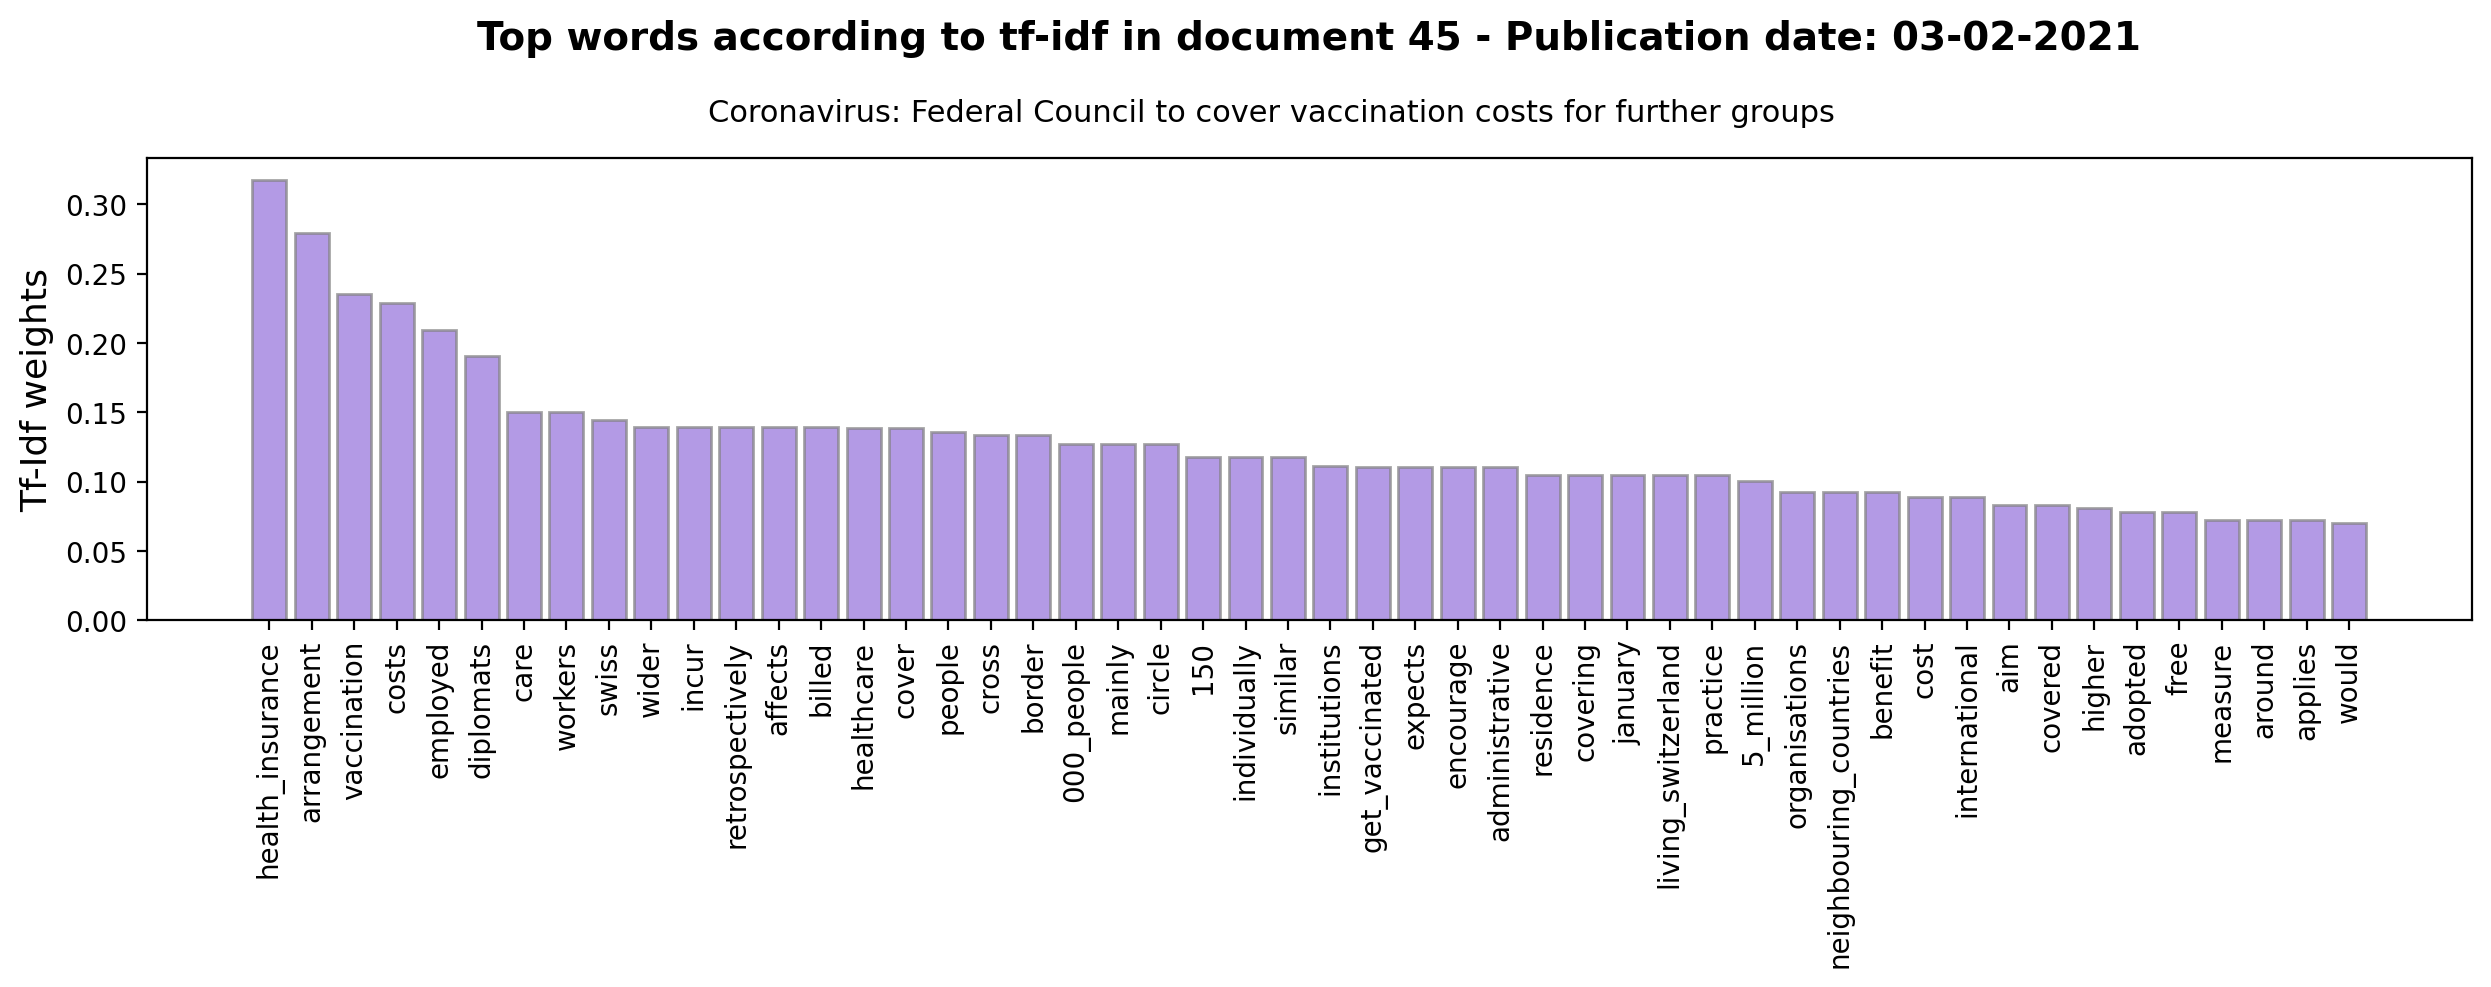

In [73]:
# Plots top words according to tf-idf scores

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
suptitle_specs  = {"fontsize": 11}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))

plt.bar(x = features_sorted,
        height=tfidf_weights_sorted,
        **barplot_specs)

plt.title('Top words according to tf-idf in document {} - Publication date: {}'.format(idx,df.iloc[idx,1].strftime("%d-%m-%Y")), **title_specs)
plt.suptitle(df.iloc[idx,0],**suptitle_specs)
plt.ylabel('Tf-Idf weights', **label_specs)
plt.xticks(rotation=90)
plt.show()